In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
import glob, re
import numpy as np
from nltk import tokenize
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt
pyplot.style.use('ggplot')
pyplot.rcParams["figure.figsize"] = (16,9)

In [3]:
# =-=-=-=-=-=-=-=-=-=-=
# Load the corpus from a small collection of files & get filenames
# =-=-=-=-=-=-=-=-=-=-= 

file_list = glob.glob('../texts/tentexts' + '/*.txt')
corpus = []
for file in file_list:
    with open(file) as f_input:
        corpus.append(f_input.read().replace('\n', ' '))
        
# Glean the filenames from the glob list

filenames = [s.replace('../texts/tentexts/', '') for s in file_list]
docs = [s.replace('.txt', '').upper() for s in filenames]

In [15]:
def sentiments(text):
    from afinn import Afinn
    afinn = Afinn()
    sentences = tokenize.sent_tokenize(text)
    sentiments = [afinn.score(sentence) for sentence in sentences ]
    return sentiments

def concreteness(text):
    """
    Returns a single float for concreteness strength based on the input text.
    The higher the number, the more concrete.
    """
    # Set up a dictionary where k = word and v = weight
    concretes = open('../metrics/Concreteness_Brysbaert_et_al.txt')
    concrete_dict = dict(map(lambda wns: (wns[0], float(wns[2])), 
                     [ ws.strip().split('\t') for ws in concretes ]))
    pattern_split = re.compile(r"\W+")
    words = pattern_split.split(text.lower())
    concretions = []
    for word in words:
        concretions.append(concrete_dict.get(word,0))
    if len(concretions) > 0:
        concreteness = sum(concretions)/math.sqrt(len(concretions))
        # Should we weight the individual word concreteness? 
        # I've seen N, sqrt(N) or 1.    
    else:
        concreteness = 0
    return concreteness

def concretes(text):
    """
    Returns a list of numbers, one for each sentence, of concreteness.
    """
    from nltk import tokenize
    sentences = tokenize.sent_tokenize(text.replace('\n', ' '))
    concretes = [ concreteness(sentence) for sentence in sentences ]
    return concretes

In [ ]:
lau13_sent = sentiments(corpus[4])
# print(lau13_sent)

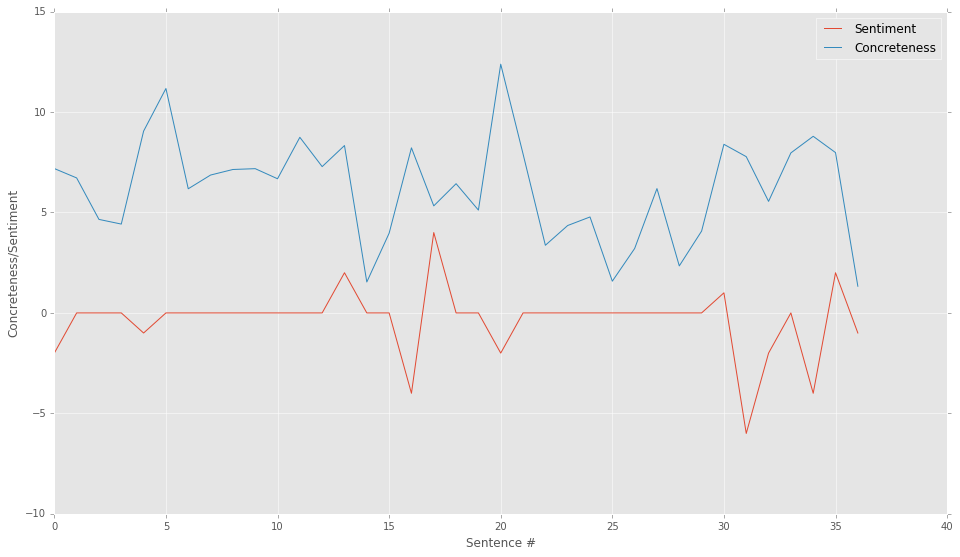

In [16]:
plt.plot(sentiments(corpus[4]), label = "Sentiment")
#plt.plot(savgol_filter(lau13_sent, 5, 2), label = "SG Filter")
plt.plot(concretes(corpus[4]), label = "Concreteness")
plt.ylabel("Concreteness/Sentiment")
plt.xlabel("Sentence #")
plt.legend(loc='upper right')
plt.show()

In [21]:
len(tokenize.sent_tokenize(text))

37

/Users/john/Library/Python/3.4/lib/python/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


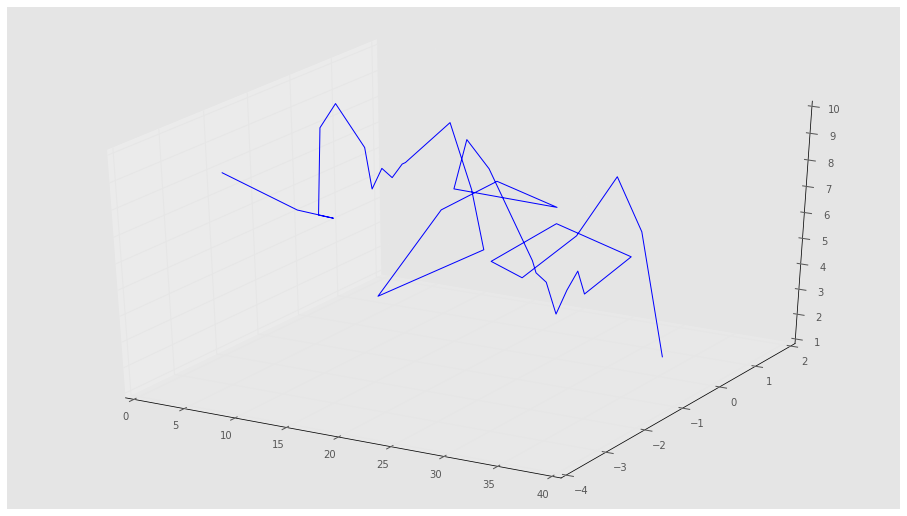

In [31]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
text = corpus[4]
X = range(len(tokenize.sent_tokenize(text)))
Y = savgol_filter(sentiments(text), 5, 2)
Z = savgol_filter(concretes(text), 5, 2)
ax.plot_wireframe(X, Y, Z)
plt.show()

In [26]:
def multi(text):
    from mpl_toolkits.mplot3d import axes3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    X, Y, Z = range(len(tokenize.sent_tokenize(text))), sentiments(text), concretes(text)
    ax.plot_wireframe(X, Y, Z)


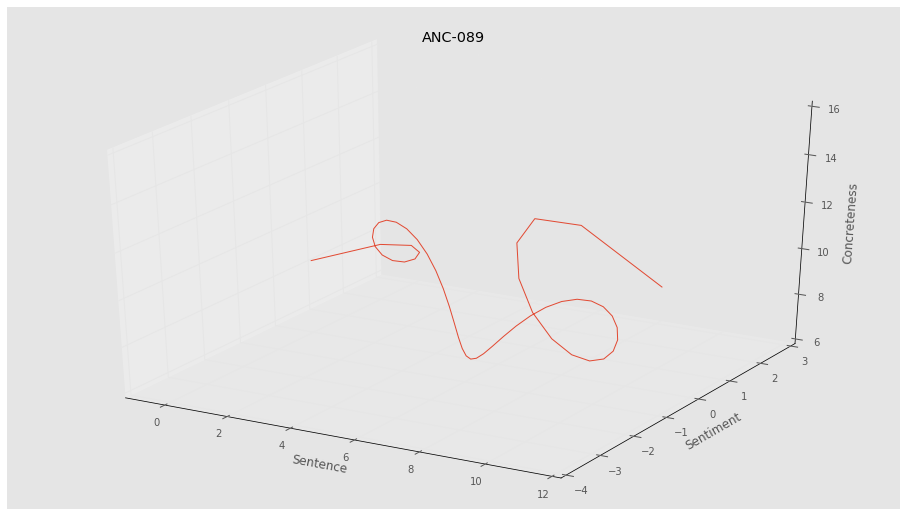

In [44]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# make labels
ax.set_xlabel('Sentence')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Concreteness')

text = corpus[1]
ax.set_title('ANC-089')

x = range(len(tokenize.sent_tokenize(text)))
y = sentiments(text)
z = concretes(text)

y_tmp = np.polyfit(x, y, 8)
f = np.poly1d(y_tmp)

z_tmp = np.polyfit(x, z, 8)
fz = np.poly1d(z_tmp)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
z_new = fz(x_new)

ax.plot(x_new, y_new, z_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

3 options for taking 3 lists and turning them into a 3-dimensional array where each sentence has the values: order, sentiment, concreteness:

```python
A = np.array(*zip(x, y, z)) # Zip is built-in
A = np.vstack((x, y, z)) # Faster when arrays are large
A = numpy.array((x, y, z), dtype=float).T # Uses transpose
```

In [38]:
text = corpus[1]

x = range(len(tokenize.sent_tokenize(text)))
y = sentiments(text)
z = concretes(text)

anc89_3D = numpy.array((x, y, z), dtype=float).T
print(anc89_3D)

[[  0.           0.           8.905     ]
 [  1.           2.           8.4783887 ]
 [  2.           0.           8.08937122]
 [  3.           0.          15.34293034]
 [  4.           0.           4.83437897]
 [  5.           0.           7.98768283]
 [  6.           0.           6.21353898]
 [  7.           0.           9.2575    ]
 [  8.           2.           5.73      ]
 [  9.           0.           7.76333333]
 [ 10.          -3.          11.63120925]
 [ 11.           0.          10.3975    ]]


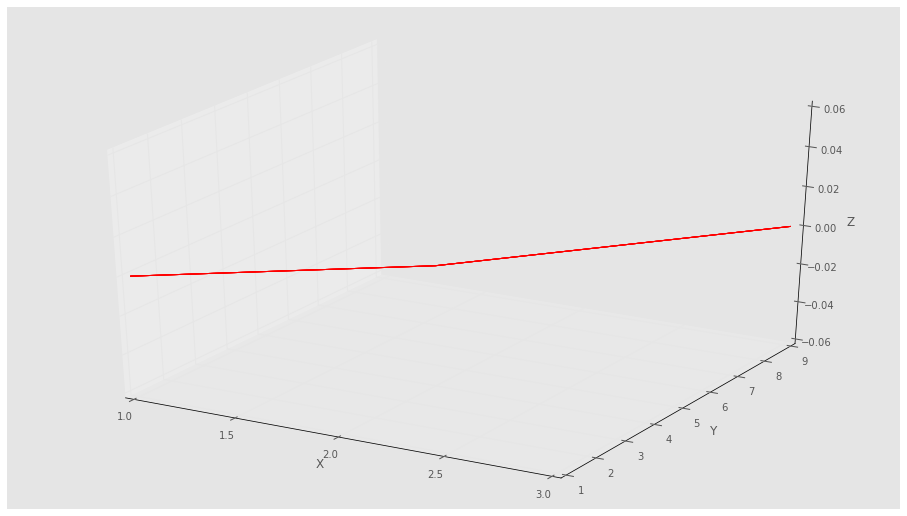

In [41]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

datasets = [{"x":[1,2,3], "y":[1,4,9], "z":[0,0,0], "colour": "red"} for _ in range(6)]

for dataset in datasets:
    ax.plot(dataset["x"], dataset["y"], dataset["z"], color=dataset["colour"])

# make labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()